In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [5]:
df = pd.read_csv("data_2_cat.csv")

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [8]:
df = df.drop('Country',axis=1)

In [9]:
df = df.drop('Happiness Rank',axis=1)

In [10]:
df = df.drop('Happiness Score',axis=1)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
df_copy = df

In [13]:
# Creating independent and dependent variables
X = df_copy.drop('tier',axis=1)
y = df_copy['tier']

In [14]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 7), (744,)
Train Data: (187, 7), (187,)


In [15]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

In [17]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.8770053475935828


[[67  9]
 [14 97]]


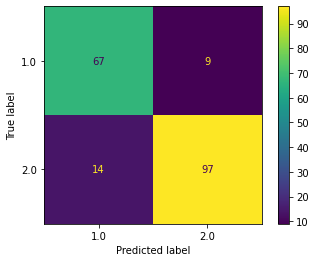

In [18]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [19]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
#fixed error : https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary 
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions,average='micro')}")

Precision Score of the classifier is: 0.8770053475935828


In [20]:
# Importing all necessary libraries
from sklearn.metrics import recall_score
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='micro')}")

Recall Score of the classifier is: 0.8770053475935828


In [21]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='micro' )}")

F1 Score of the classifier is: 0.8770053475935828


In [22]:
target_names = ['class 0', 'class 1']
report = classification_report(y_test, predictions, target_names=target_names)

In [23]:
print(report)

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85        76
     class 1       0.92      0.87      0.89       111

    accuracy                           0.88       187
   macro avg       0.87      0.88      0.87       187
weighted avg       0.88      0.88      0.88       187



In [24]:
from sklearn.metrics import cohen_kappa_score
print(f"cohen Kappa Score of the classifier is: {cohen_kappa_score(y_test, predictions)}")
#print(f"quad Kappa Score of the classifier is: {kappa(y_test, predictions,weights='quadratic')}")

cohen Kappa Score of the classifier is: 0.7476975420895172


In [26]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

#added pos_label=1 because before i had the error ValueError: multiclass format is not supported
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported 
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=1)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

AUC for our classifier is: 0.12227358937885255


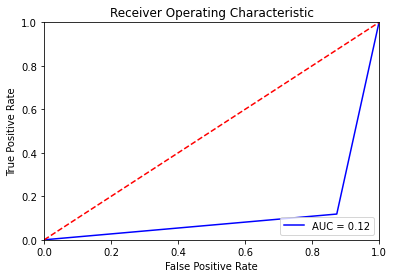

In [27]:
# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()